In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [41]:
df_data= pd.read_csv("../data/adult/adult_anonymized_2500.csv", delimiter=';')

In [42]:
df_data.head()

,ID,sex,age,race,marital-status,education,native-country,workclass,occupation,salary-class
0,0,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
1,1,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
2,2,Male,31~38,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
3,3,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
4,4,Female,17~35,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th~Masters~9th~Some-colleg...,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K


In [43]:
df_data["native-country"].value_counts().index[0]

'United-States~Cuba~Jamaica~India~Mexico~Puerto-Rico~Honduras~England~Canada~Germany~Iran~Philippines~Poland~Columbia~Cambodia~Thailand~Ecuador~Laos~Taiwan~Haiti~Portugal~Dominican-Republic~El-Salvador~France~Guatemala~Italy~China~South~Japan~Yugoslavia~Peru~Outlying-US(Guam-USVI-etc)~Scotland~Trinadad&Tobago~Greece~Nicaragua~Vietnam~Hong~Ireland~Hungary'

In [44]:
col_names = df_data.columns
print(col_names)

Index(['ID', 'sex', 'age', 'race', 'marital-status', 'education',
       'native-country', 'workclass', 'occupation', 'salary-class'],
      dtype='object')


In [45]:
df_data.drop('ID',axis=1)

,sex,age,race,marital-status,education,native-country,workclass,occupation,salary-class
0,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
1,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
2,Male,31~38,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
3,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
4,Female,17~35,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th~Masters~9th~Some-colleg...,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
...,...,...,...,...,...,...,...,...,...
30157,Female,17~35,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th~Masters~9th~Some-colleg...,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
30158,Male,39~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,>50K
30159,Female,36~90,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad~11th~Masters~9th~Some-colleg...,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K
30160,Male,17~30,White~Black~Asian-Pac-Islander~Amer-Indian-Esk...,Never-married~Married-civ-spouse~Divorced~Marr...,Bachelors~HS-grad,United-States~Cuba~Jamaica~India~Mexico~Puerto...,State-gov~Self-emp-not-inc~Private~Federal-gov...,Adm-clerical~Exec-managerial~Handlers-cleaners...,<=50K


In [18]:
print(df_data["age"])

0           39
1           50
2        37~38
3        48~54
4        24~35
         ...  
30157    22~30
30158       40
30159    55~58
30160    21~22
30161    48~71
Name: age, Length: 30162, dtype: object


In [46]:
for c in col_names: 
    df_data = df_data.replace("?", np.NaN) 
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [47]:
category_col =['age','workclass', 'education', 'marital-status', 'occupation', 
               'race', 'sex', 'native-country', 'salary-class']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'age': {'17~30': 0, '17~35': 1, '17~38': 2, '31~38': 3, '36~90': 4, '39~90': 5}, 'workclass': {'State-gov~Self-emp-not-inc~Private~Federal-gov~Local-gov~Self-emp-inc': 0, 'State-gov~Self-emp-not-inc~Private~Federal-gov~Local-gov~Self-emp-inc~Without-pay': 1}, 'education': {'11th~Masters~9th~Some-college~Assoc-acdm~7th-8th~Doctorate~Assoc-voc~Prof-school~5th-6th~10th~Preschool~12th~1st-4th': 0, 'Bachelors~HS-grad': 1, 'Bachelors~HS-grad~11th': 2, 'Bachelors~HS-grad~11th~Masters~9th~Some-college~Assoc-acdm~7th-8th~Doctorate~Assoc-voc~Prof-school~5th-6th~10th~Preschool~12th~1st-4th': 3, 'Masters~9th~Some-college~Assoc-acdm~7th-8th~Doctorate~Assoc-voc~Prof-school~5th-6th~10th~Preschool~12th~1st-4th': 4}, 'marital-status': {'Never-married~Married-civ-spouse~Divorced~Married-spouse-absent~Separated~Married-AF-spouse~Widowed': 0}, 'occupation': {'Adm-clerical~Exec-managerial~Handlers-cleaners~Prof-specialty~Other-service~Sales~Transport-moving~Farming-fishing~Machine-op-inspct~Tech-support~C

In [48]:
Y = df_data['salary-class']
X = df_data.drop('salary-class', axis = 1) 
# df_data=df_data.drop('age',axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [50]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

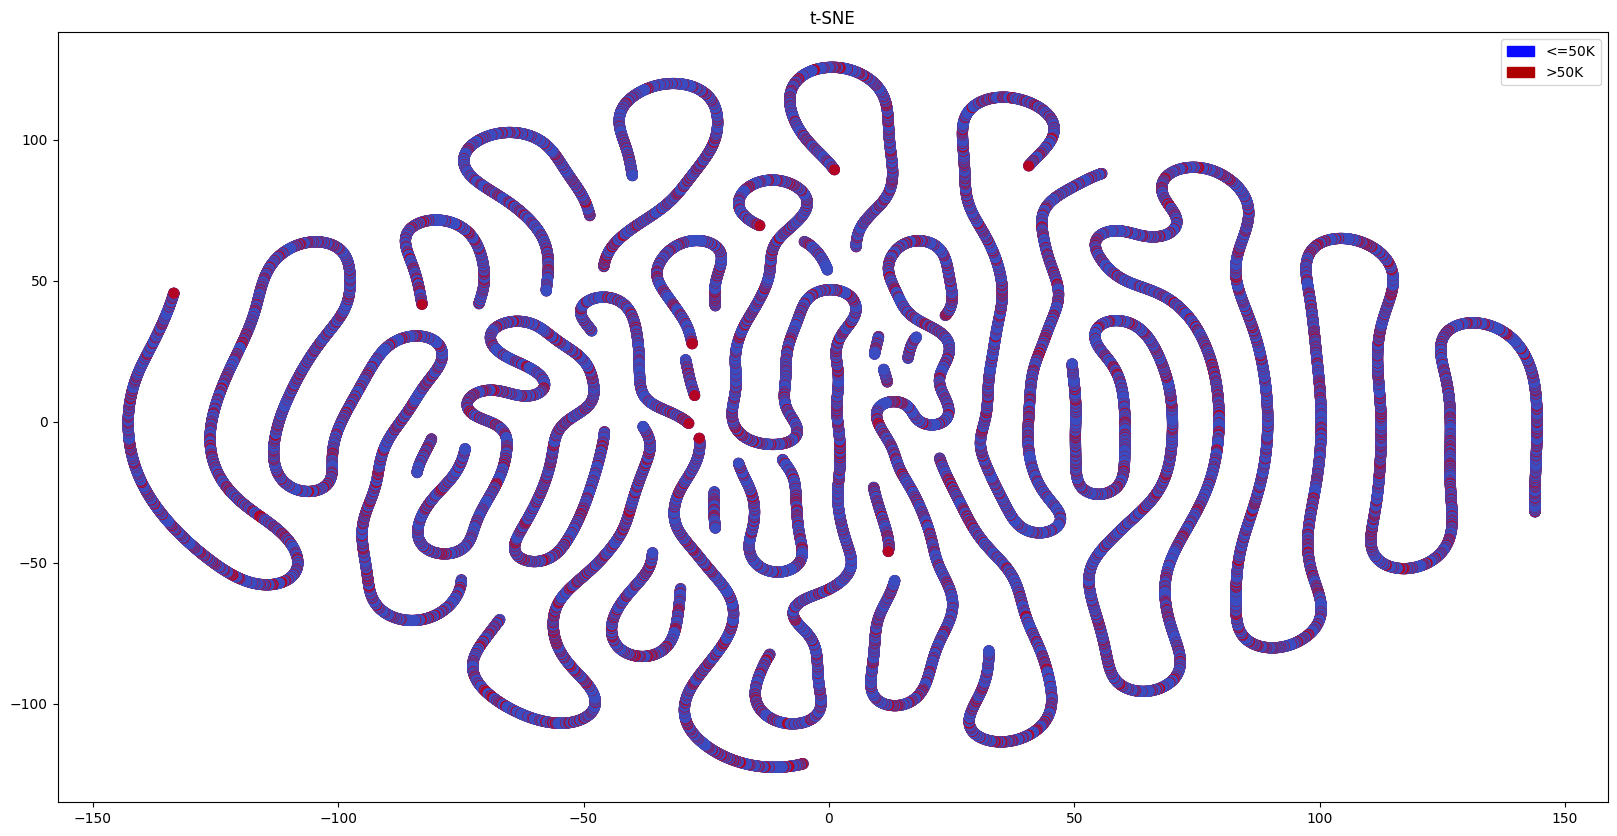

In [51]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[5280 1471]
 [1531  767]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6751
           1       0.34      0.33      0.34      2298

    accuracy                           0.67      9049
   macro avg       0.56      0.56      0.56      9049
weighted avg       0.67      0.67      0.67      9049

Accuracy Score: 0.6682506354293292
Recall Score: 0.3337684943429069
Precision Score: 0.3427167113494191
ROC AUC Score:  0.5579374244785191
Threshold: [inf  1.  0.]


In [59]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold:", gbc_threshold)

[[6705   46]
 [2264   34]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      6751
           1       0.42      0.01      0.03      2298

    accuracy                           0.74      9049
   macro avg       0.59      0.50      0.44      9049
weighted avg       0.67      0.74      0.64      9049

Accuracy Score: 0.7447231738313626
Recall Score: 0.014795474325500435
Precision Score: 0.425
ROC AUC Score:  0.5039908344816659
Threshold: [inf  1.  0.]


In [60]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[6724   27]
 [2272   26]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      6751
           1       0.49      0.01      0.02      2298

    accuracy                           0.75      9049
   macro avg       0.62      0.50      0.44      9049
weighted avg       0.68      0.75      0.64      9049

Accuracy Score: 0.745938777765499
Recall Score: 0.011314186248912098
Precision Score: 0.49056603773584906
ROC AUC Score:  0.5036573893768631
Threshold: [inf  1.  0.]


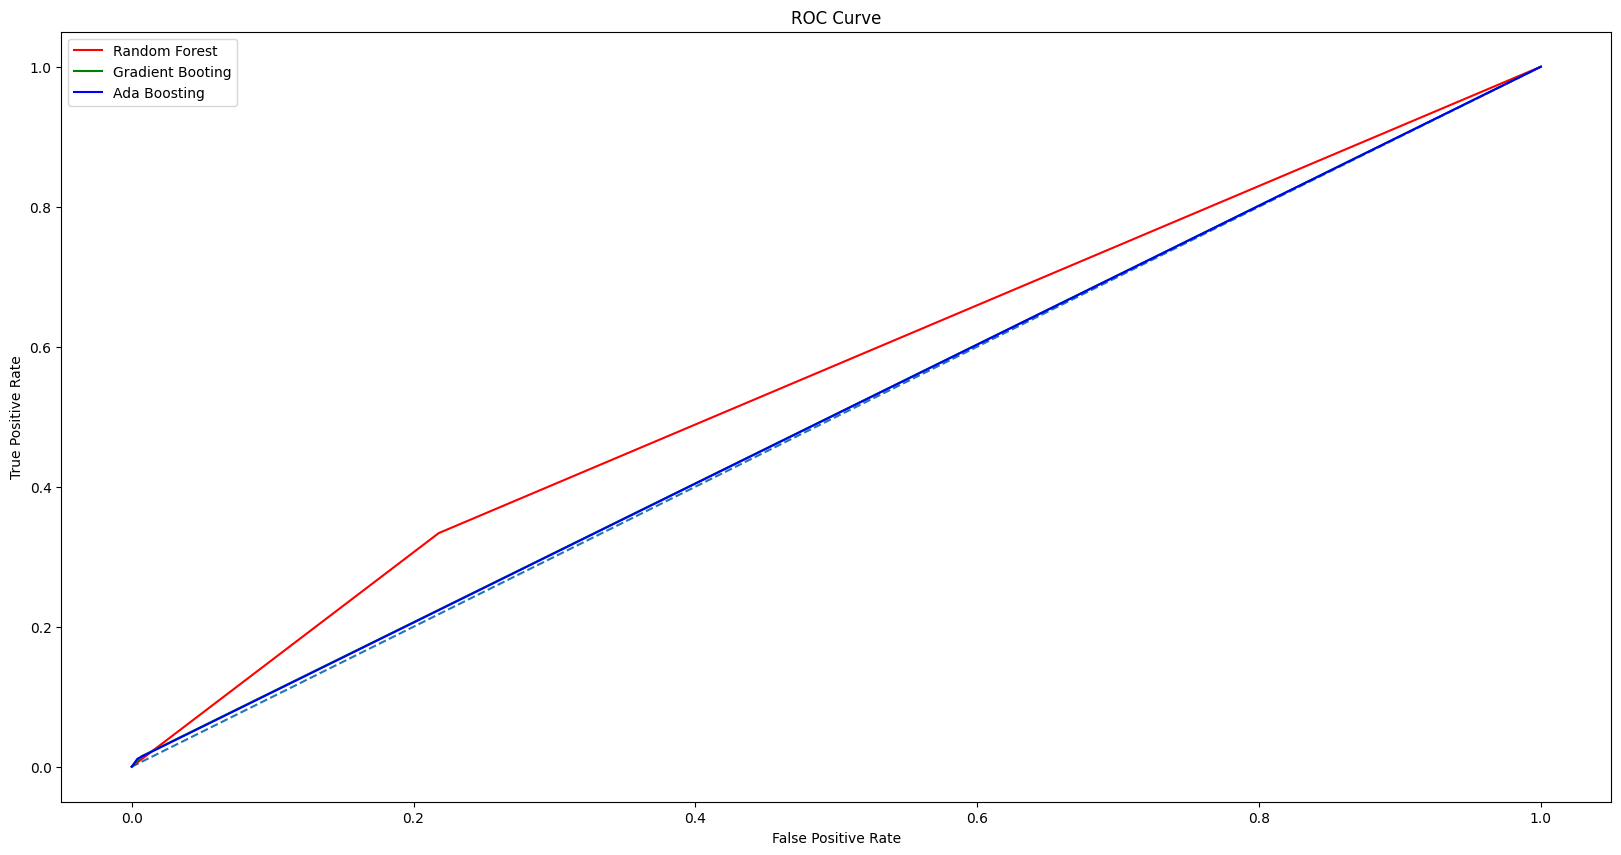

In [61]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [62]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,ID,0.878893
2,age,0.059452
5,education,0.026896
1,sex,0.016504
6,native-country,0.010350
7,workclass,0.004166
8,occupation,0.003738
4,marital-status,0.000000
3,race,0.000000


Text(0.5, 1.0, 'Plot Feature Importances')

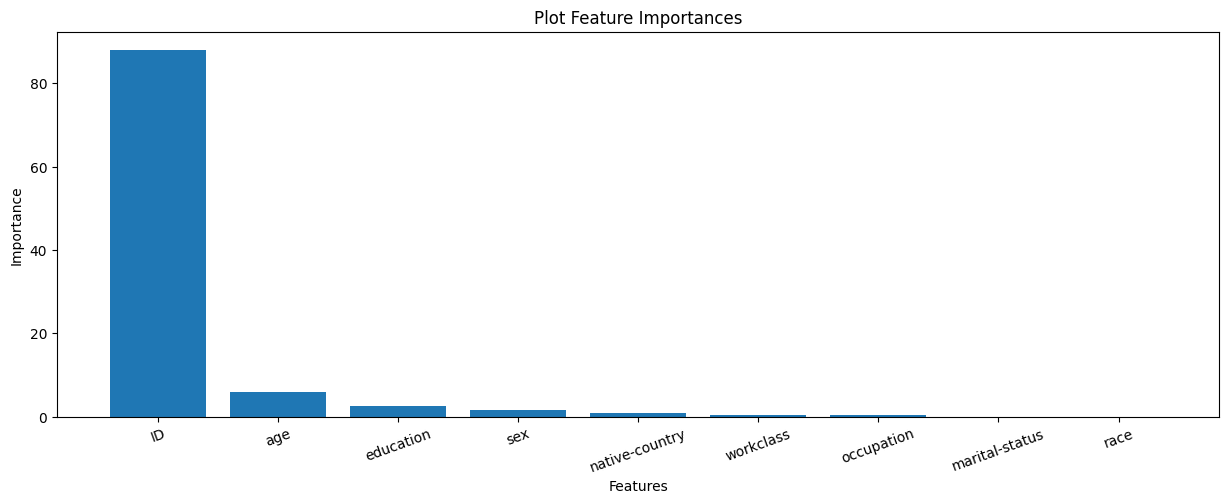

In [63]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")